In [385]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Essential libraries
import os
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from pandas.plotting import parallel_coordinates

# Interactive visualizations
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)  # Initialize Plotly for offline mode

# Animated visualizations
from bubbly.bubbly import bubbleplot

# Machine learning & model explanation
import sklearn
import imblearn
import shap
import eli5

In [386]:
# let's import the data
data = pd.read_csv('insurance_claims.csv')

# let's take a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [387]:
# let's take a look at the sample of the data

data.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
704,168,39,217899,1994-06-13,IL,500/1000,1000,1389.59,0,479134,...,NO,41580,3780,7560,30240,Chevrolet,Malibu,2015,Y,NaN
275,243,43,367595,2006-02-03,IN,500/1000,500,1307.74,0,466137,...,NO,37530,4170,4170,29190,Jeep,Wrangler,2008,N,NaN
274,217,39,522506,1992-03-15,IL,500/1000,2000,1399.85,0,605490,...,?,64920,10820,10820,43280,Ford,Fusion,1997,N,NaN
364,291,46,832746,2006-04-13,OH,500/1000,1000,994.74,0,452701,...,YES,5580,620,620,4340,Volkswagen,Passat,2005,Y,NaN
299,119,27,515698,1997-08-05,IN,250/500,2000,1097.64,0,614812,...,?,63720,7080,21240,35400,Accura,TL,2006,N,NaN


In [388]:
# let's check the shape of the dataset

data.shape

(1000, 40)

In [389]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [390]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [391]:
# let's check whether the data has any null values or not.

# but there are '?' in the datset which we have to remove by NaN Values
data = data.replace('?',np.nan)

data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [392]:
# Handling missing values using fillna

# Replace '?' with the most common collision type
collision_mode = data['collision_type'].mode()[0]  # Compute mode once for efficiency
data['collision_type'].fillna(collision_mode, inplace=True)

# If property damage is missing, assume 'NO' (no damage)
data['property_damage'].fillna('NO', inplace=True)

# If police report availability is missing, assume 'NO report available'
data['police_report_available'].fillna('NO', inplace=True)

# Check if any missing values remain
has_missing_values = data.isnull().any().any()
print("Any remaining missing values:", has_missing_values)

Any remaining missing values: True


In [393]:
# missing_cols = data.columns[data.isnull().any()]
# print("Columns with missing values:", missing_cols)
# print(data[missing_cols].isnull().sum())

In [394]:
# # Fill authorities_contacted with 'Unknown' if missing
# data['authorities_contacted'].fillna('Unknown', inplace=True)

# # Check if _c39 is numerical or categorical
# if data['_c39'].dtype == 'O':  # If categorical
#     data['_c39'].fillna('Unknown', inplace=True)
# else:  # If numerical
#     data['_c39'].fillna(data['_c39'].median(), inplace=True)

In [395]:
# data.drop(columns=['_c39'], inplace=True)

In [396]:
# # Check if any missing values remain
# has_missing_values = data.isnull().any().any()
# print("Any remaining missing values:", has_missing_values)

## Data Visualizations

In [397]:
# Compute fraud report distribution
fraud_counts = data['fraud_reported'].value_counts()

# Define labels and values
labels = fraud_counts.index
sizes = fraud_counts.values
colors = ['silver', 'gold']

# Create pie chart trace with better formatting
trace = go.Pie(
    labels=labels,
    values=sizes,
    marker=dict(colors=colors),
    name='Frauds',
    hole=0.3
)

# Define layout with enhanced readability
layout = go.Layout(
    title='Distribution of Frauds',
    title_x=0.5  # Center the title for better visual balance
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

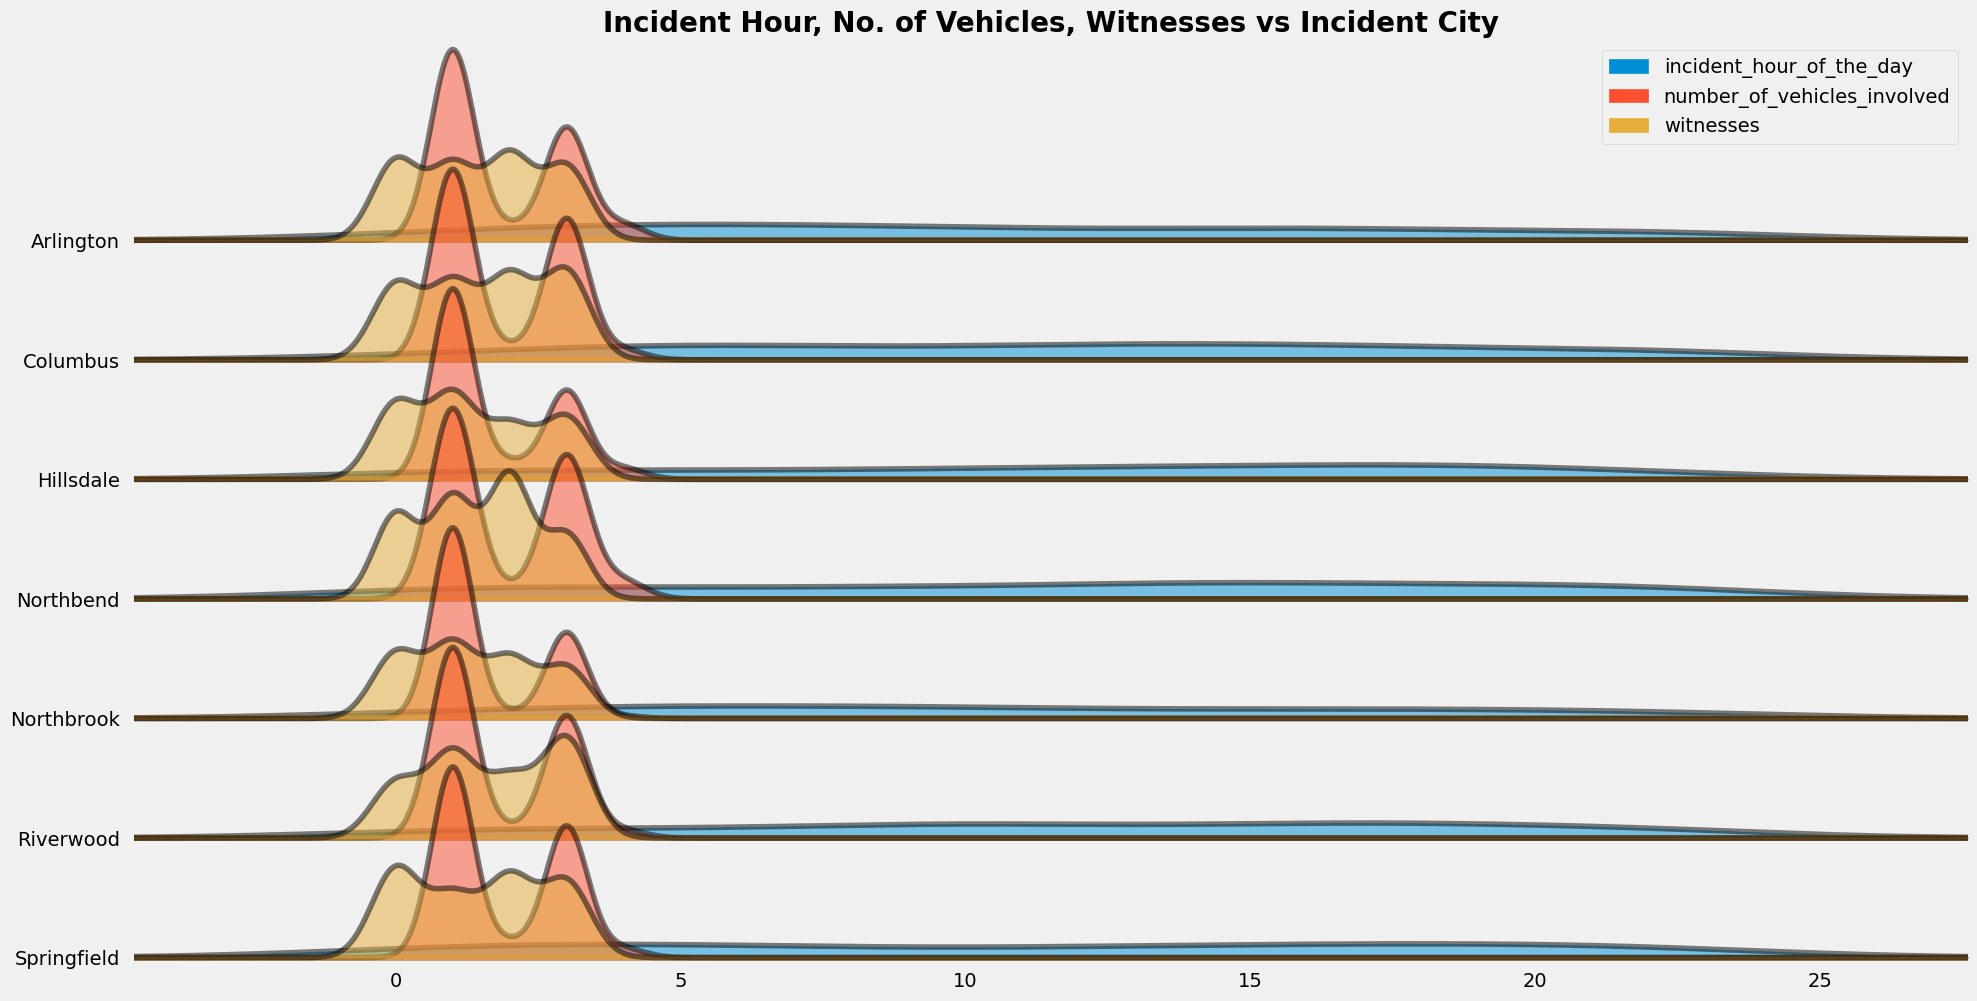

In [398]:
# Improved Joyplot visualization with better structure and readability
fig, axes = joypy.joyplot(
    data,
    column=['incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses'],
    by='incident_city',
    ylim='own',
    figsize=(20, 10),
    alpha=0.5,
    legend=True
)

# Centering and enhancing title readability
plt.title(
    'Incident Hour, No. of Vehicles, Witnesses vs Incident City',
    fontsize=20,
    fontweight='bold'
)

plt.show()

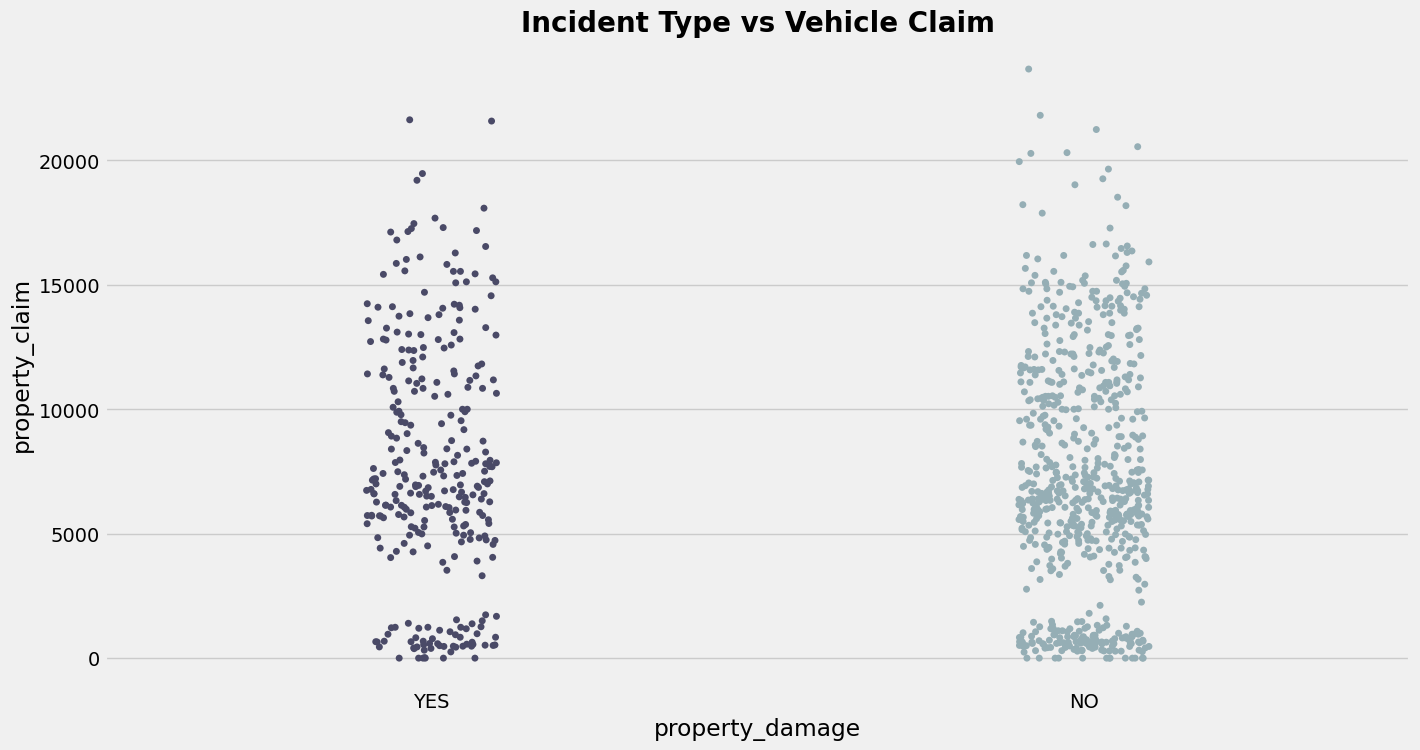

In [399]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create strip plot with improved formatting
sns.stripplot(
    x='property_damage',
    y='property_claim',
    data=data,
    palette='bone',
    jitter=True  # Adds slight randomness to prevent overlap
)

# Enhance title visibility
plt.title(
    'Incident Type vs Vehicle Claim',
    fontsize=20,
    fontweight='bold'
)

plt.show()

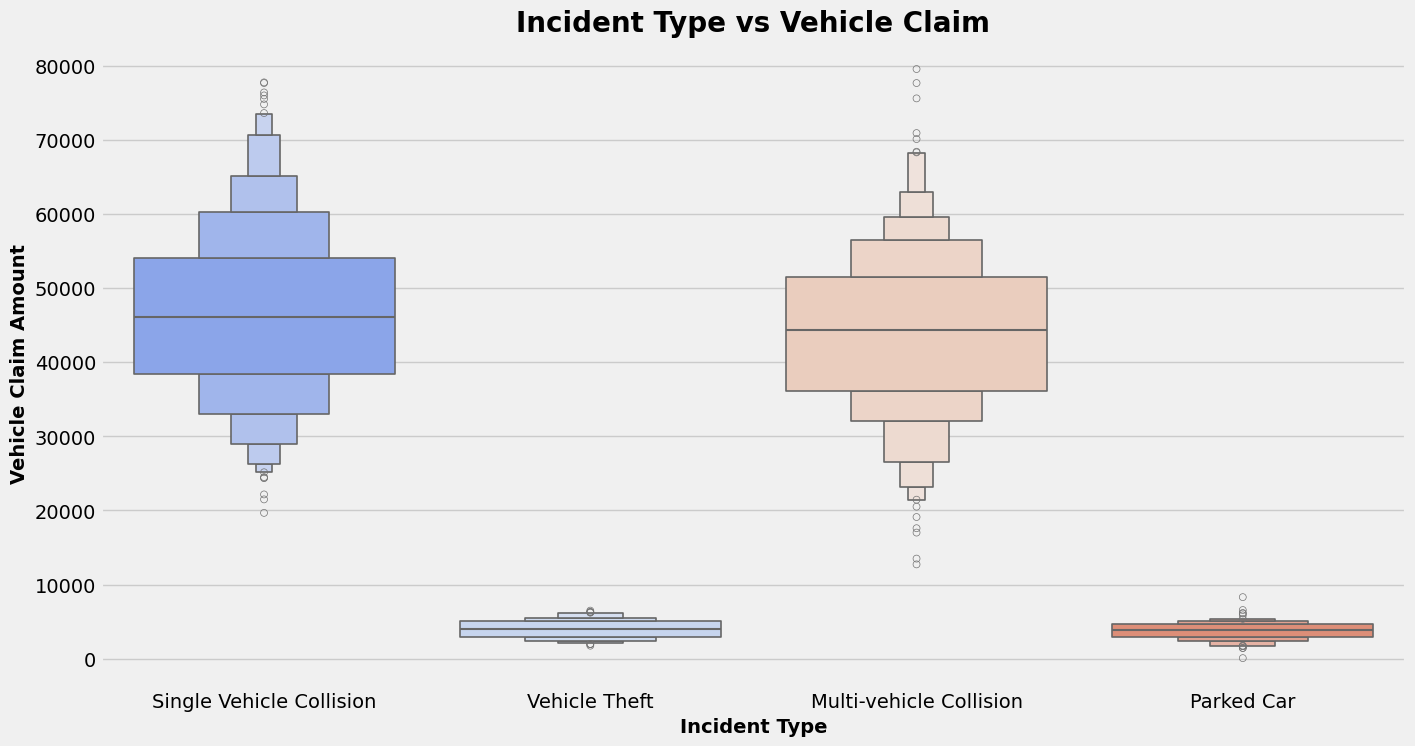

In [400]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create boxen plot with improved formatting
sns.boxenplot(
    x='incident_type',
    y='vehicle_claim',
    data=data,
    palette='coolwarm',  # Improved color contrast for readability
    linewidth=1.2  # Slightly enhance edge visibility
)

# Enhance title visibility
plt.title(
    'Incident Type vs Vehicle Claim',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('Incident Type', fontsize=14, fontweight='bold')  # Improve axis label visibility
plt.ylabel('Vehicle Claim Amount', fontsize=14, fontweight='bold')

plt.show()

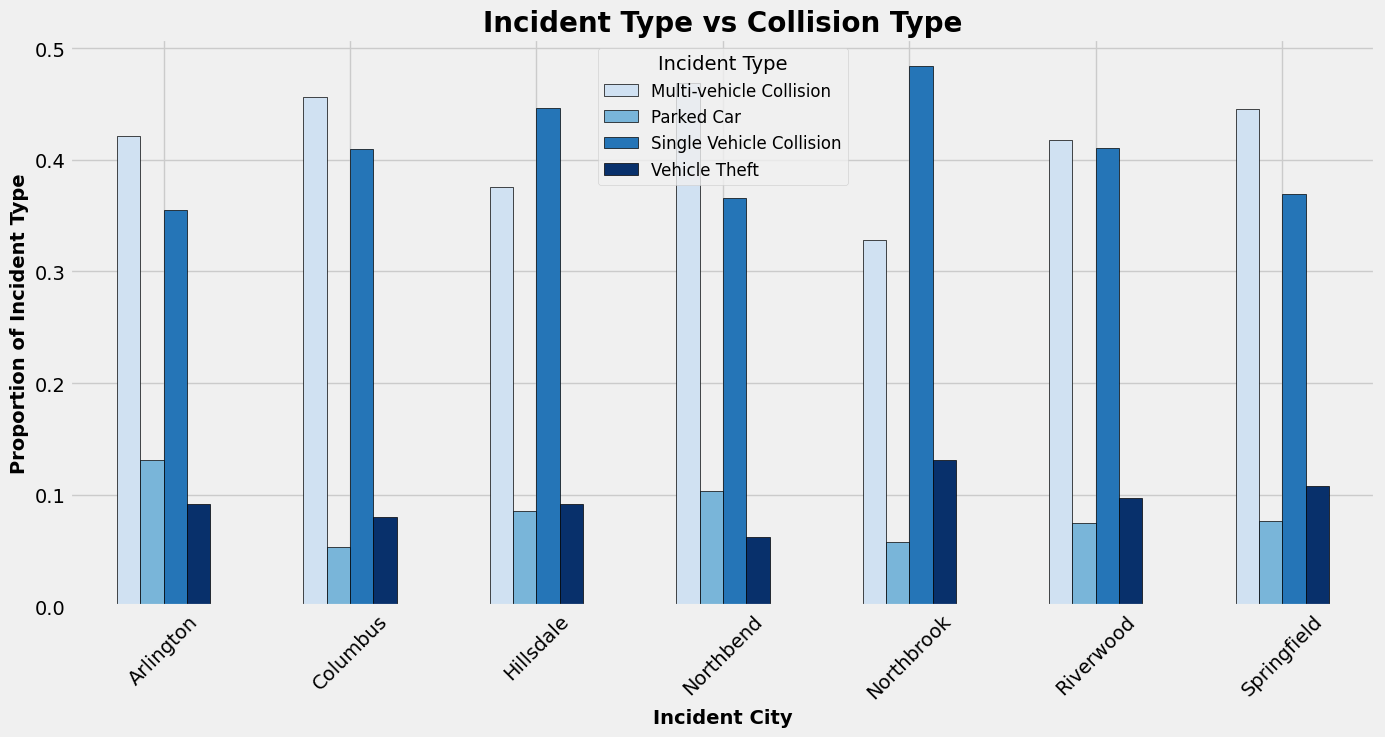

In [401]:
# Compute the crosstab for incident city vs. incident type
incident = pd.crosstab(data['incident_city'], data['incident_type'])

# Define color mapping with improved contrast
colors = plt.cm.Blues(np.linspace(0.2, 1, len(incident.columns)))  # Dynamic color scaling

# Normalize data for better comparison
incident_normalized = incident.div(incident.sum(axis=1), axis=0)

# Create a bar plot with enhanced formatting
incident_normalized.plot(
    kind='bar',
    stacked=False,
    figsize=(15, 7),
    color=colors,
    edgecolor='black'  # Improve visibility
)

# Enhance title and legend formatting
plt.title('Incident Type vs Collision Type', fontsize=20, fontweight='bold')
plt.xlabel('Incident City', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Incident Type', fontsize=14, fontweight='bold')
plt.legend(title="Incident Type", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

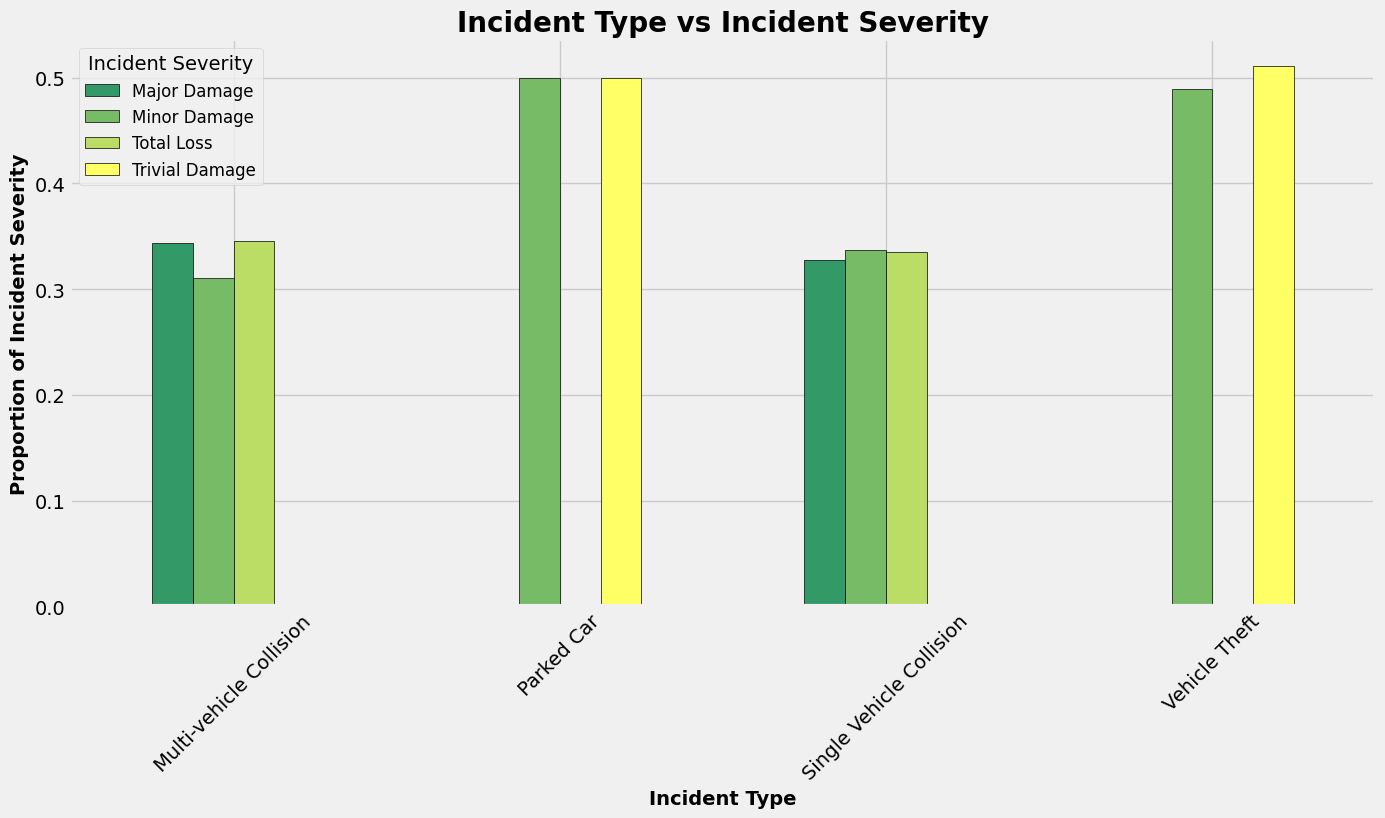

In [402]:
# Compute the crosstab for incident type vs. incident severity
incident = pd.crosstab(data['incident_type'], data['incident_severity'])

# Define dynamic color mapping for better adaptability
colors = plt.cm.summer(np.linspace(0.2, 1, len(incident.columns)))  # Adjusted color scaling

# Normalize the data for better comparison across incident types
incident_normalized = incident.div(incident.sum(axis=1), axis=0)

# Create bar plot with enhanced formatting
incident_normalized.plot(
    kind='bar',
    stacked=False,
    figsize=(15, 7),
    color=colors,
    edgecolor='black'  # Improves visibility of bars
)

# Improve title, labels, and legend formatting
plt.title('Incident Type vs Incident Severity', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Incident Severity', fontsize=14, fontweight='bold')
plt.legend(title="Incident Severity", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

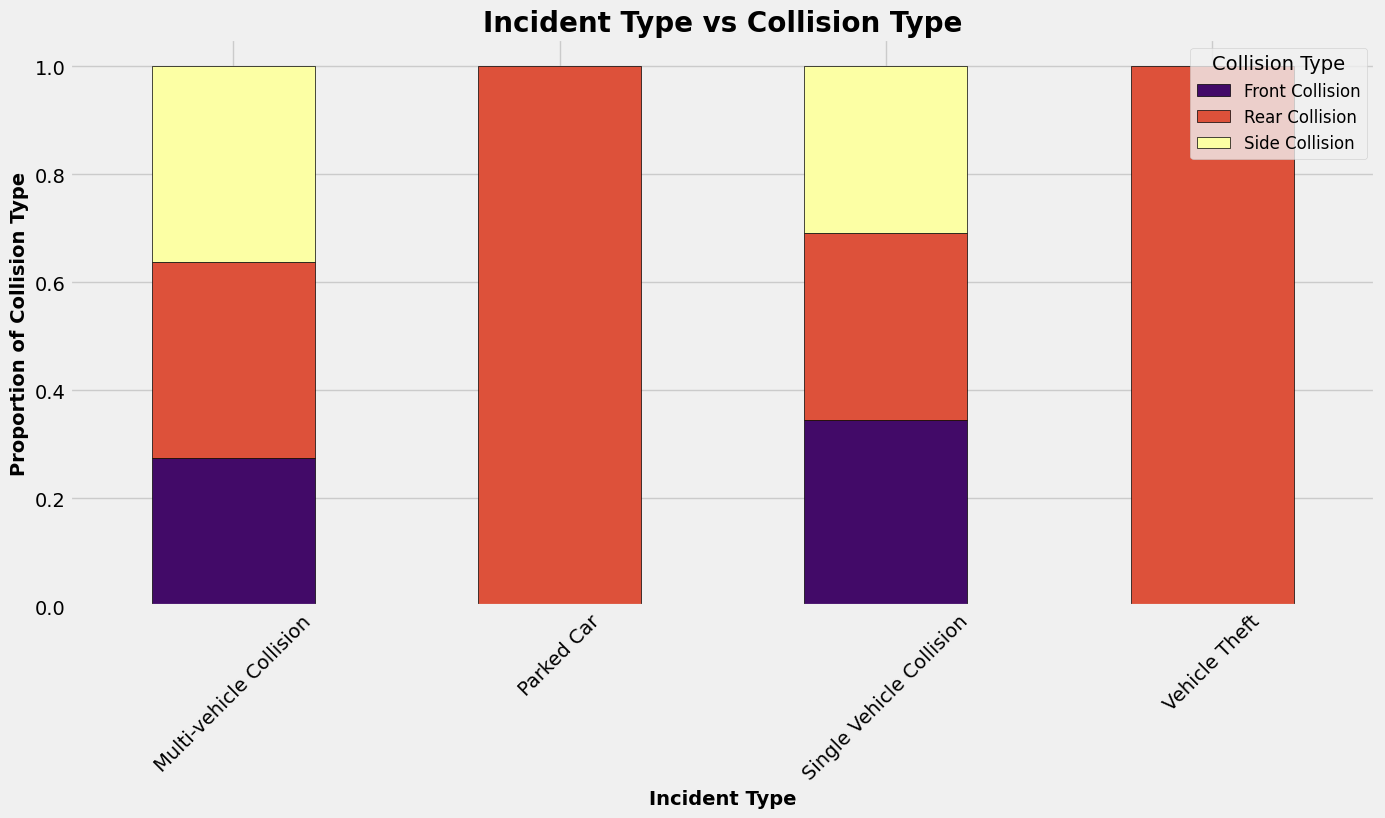

In [403]:
# Compute the crosstab for incident type vs. collision type
incident = pd.crosstab(data['incident_type'], data['collision_type'])

# Define dynamic color mapping with better contrast
colors = plt.cm.inferno(np.linspace(0.2, 1, len(incident.columns)))  # Adjust color range dynamically

# Normalize values for proportional representation
incident_normalized = incident.div(incident.sum(axis=1), axis=0)

# Create a stacked bar plot with enhanced formatting
incident_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 7),
    color=colors,
    edgecolor='black'  # Improves visibility
)

# Improve title and axis labels formatting
plt.title('Incident Type vs Collision Type', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Collision Type', fontsize=14, fontweight='bold')

# Enhance legend readability
plt.legend(title="Collision Type", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

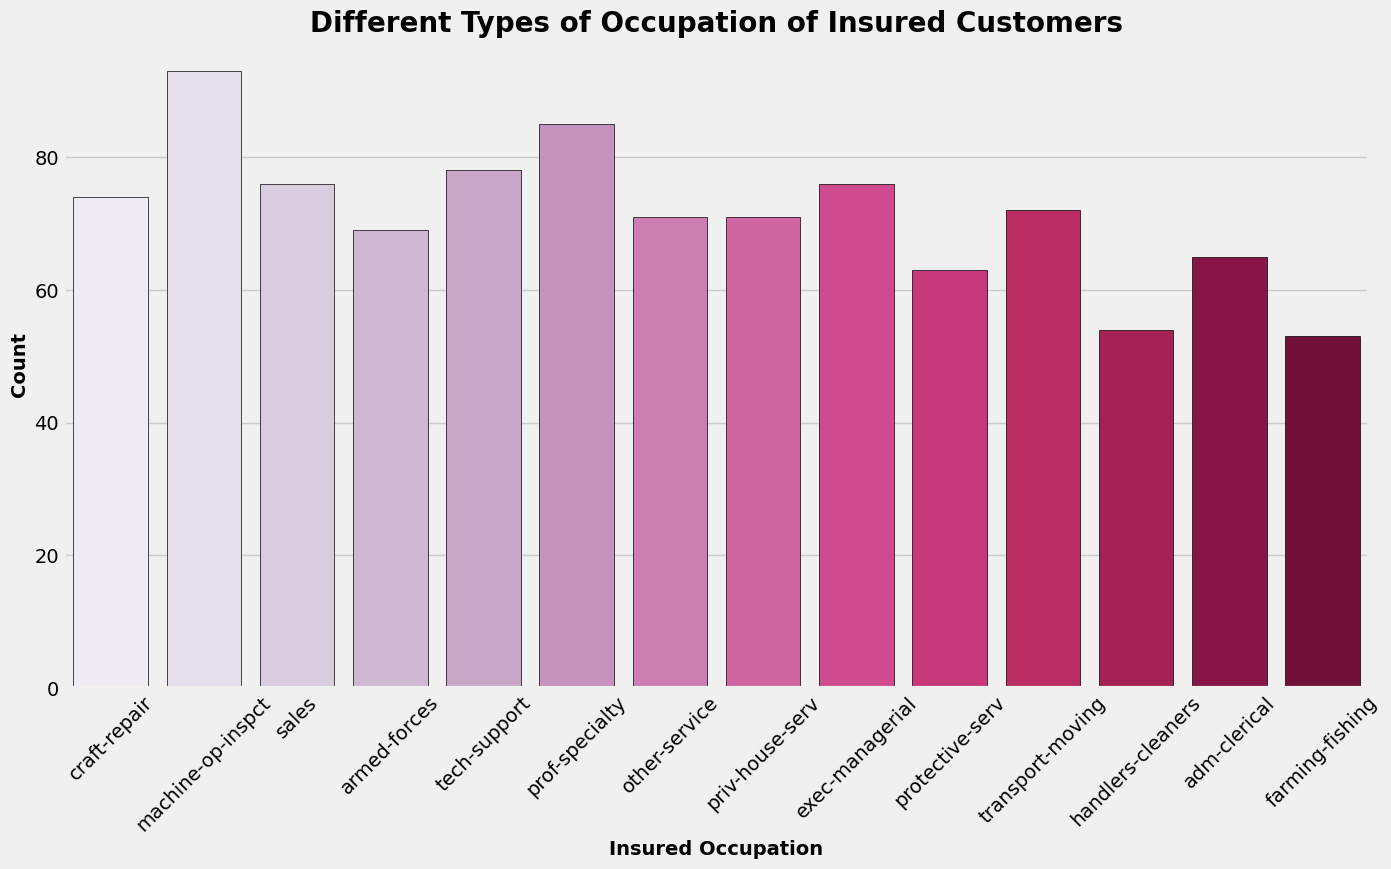

In [404]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create count plot with improved formatting
sns.countplot(
    x=data['insured_occupation'],
    palette='PuRd',
    edgecolor='black'  # Improves bar visibility
)

# Improve title and labels
plt.title('Different Types of Occupation of Insured Customers', fontsize=20, fontweight='bold')
plt.xlabel('Insured Occupation', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

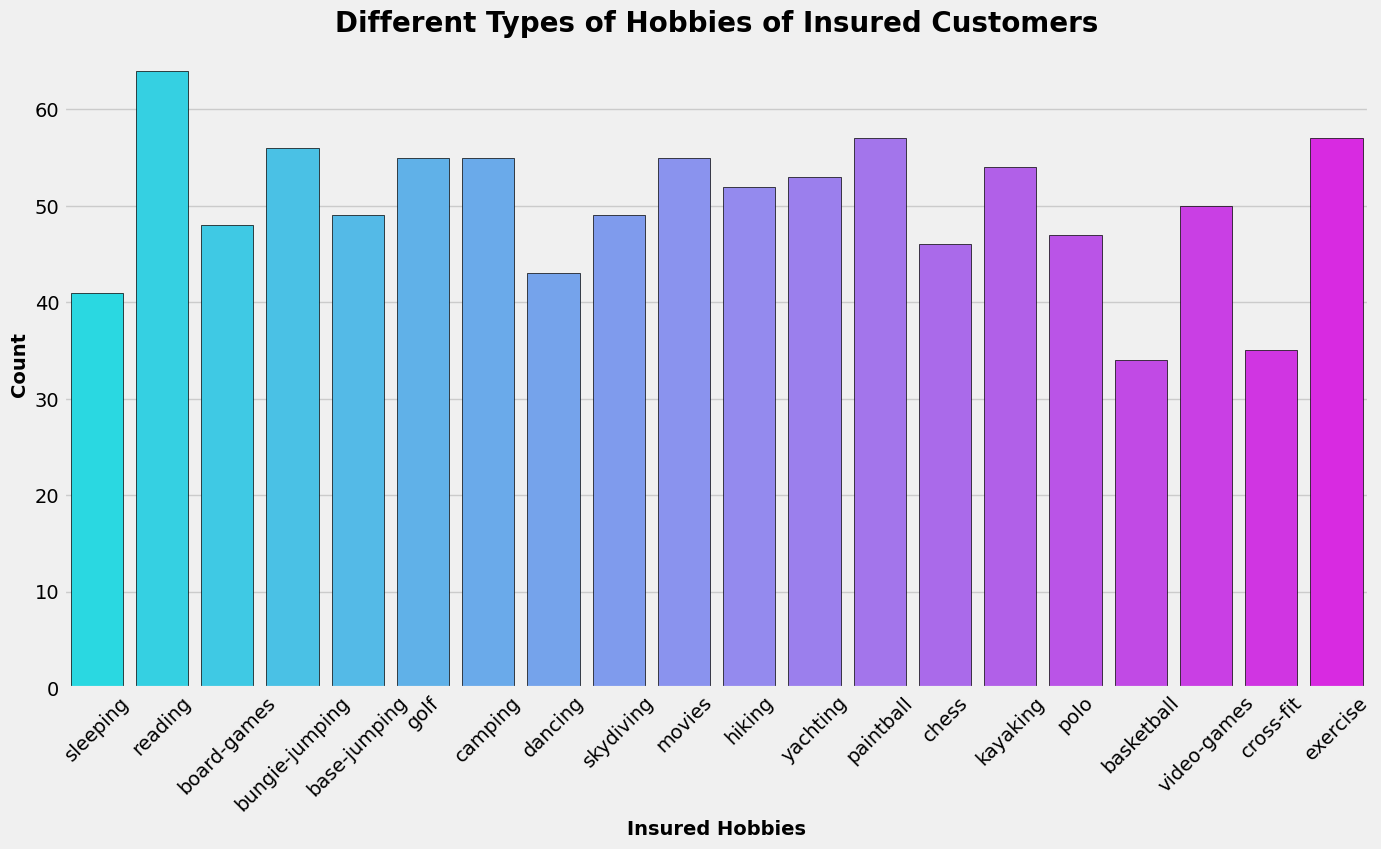

In [405]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create count plot with improved formatting
sns.countplot(
    x=data['insured_hobbies'],
    palette='cool',
    edgecolor='black'  # Enhances bar visibility
)

# Improve title and labels for better clarity
plt.title('Different Types of Hobbies of Insured Customers', fontsize=20, fontweight='bold')
plt.xlabel('Insured Hobbies', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

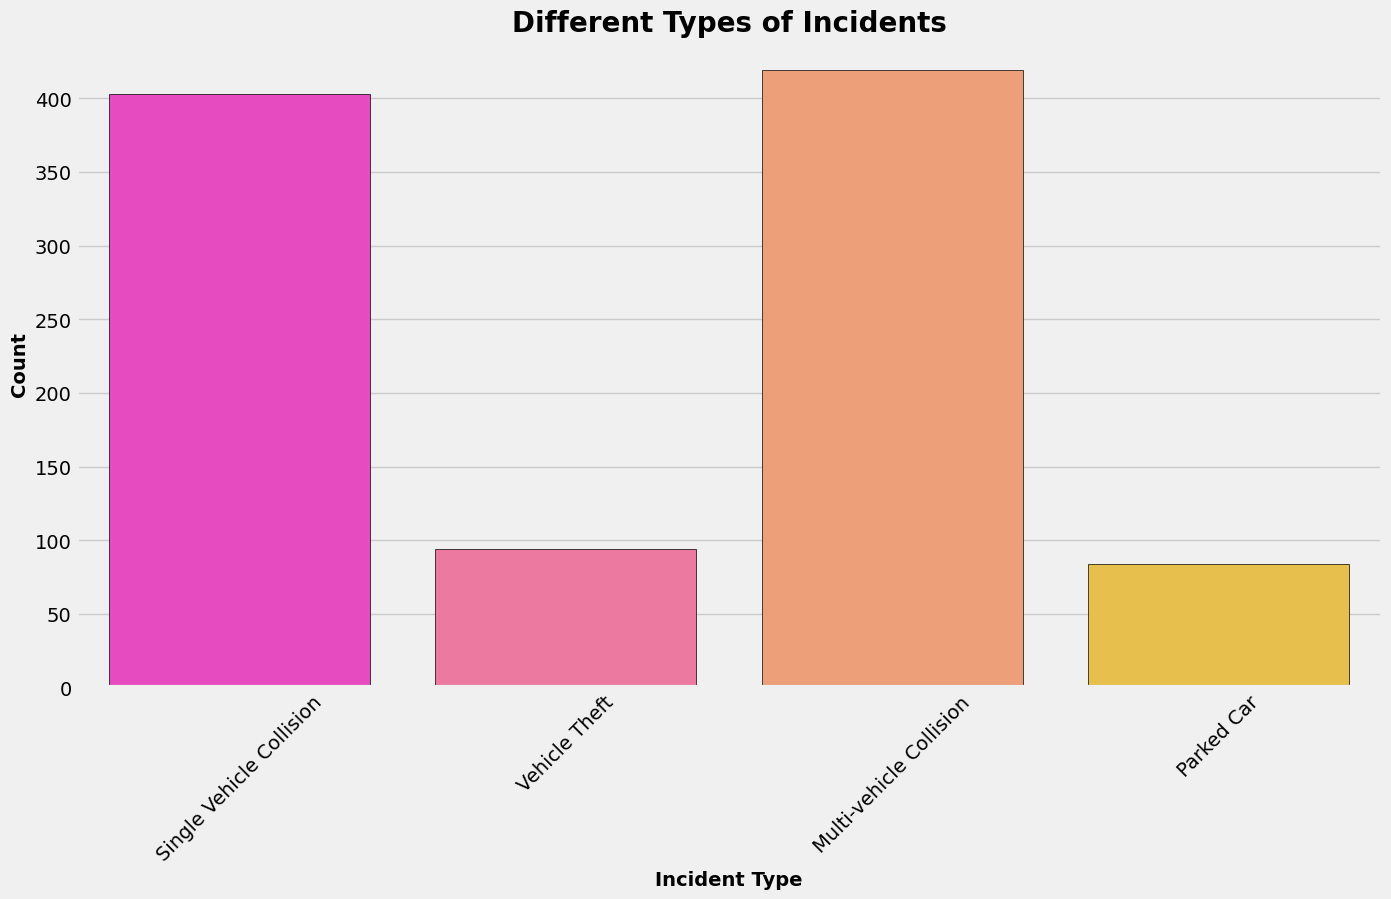

In [406]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create count plot with improved formatting
sns.countplot(
    x=data['incident_type'],
    palette='spring',
    edgecolor='black'  # Enhances bar definition
)

# Improve title and labels for better clarity
plt.title('Different Types of Incidents', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

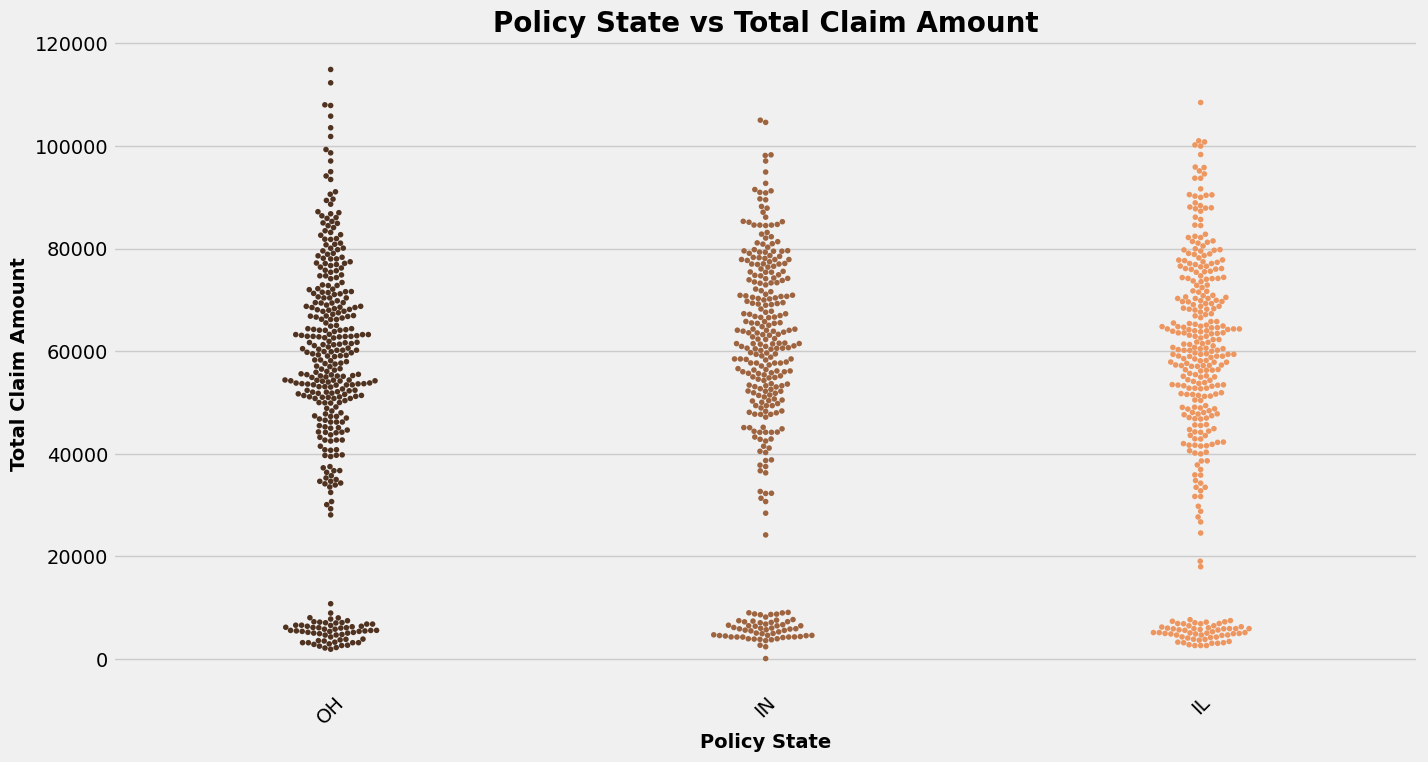

In [407]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create swarm plot with improved formatting
sns.swarmplot(
    x='policy_state',
    y='total_claim_amount',
    data=data,
    palette='copper',
    size=4  # Adjust point size for better visibility
)

# Improve title and labels for better clarity
plt.title('Policy State vs Total Claim Amount', fontsize=20, fontweight='bold')
plt.xlabel('Policy State', fontsize=14, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

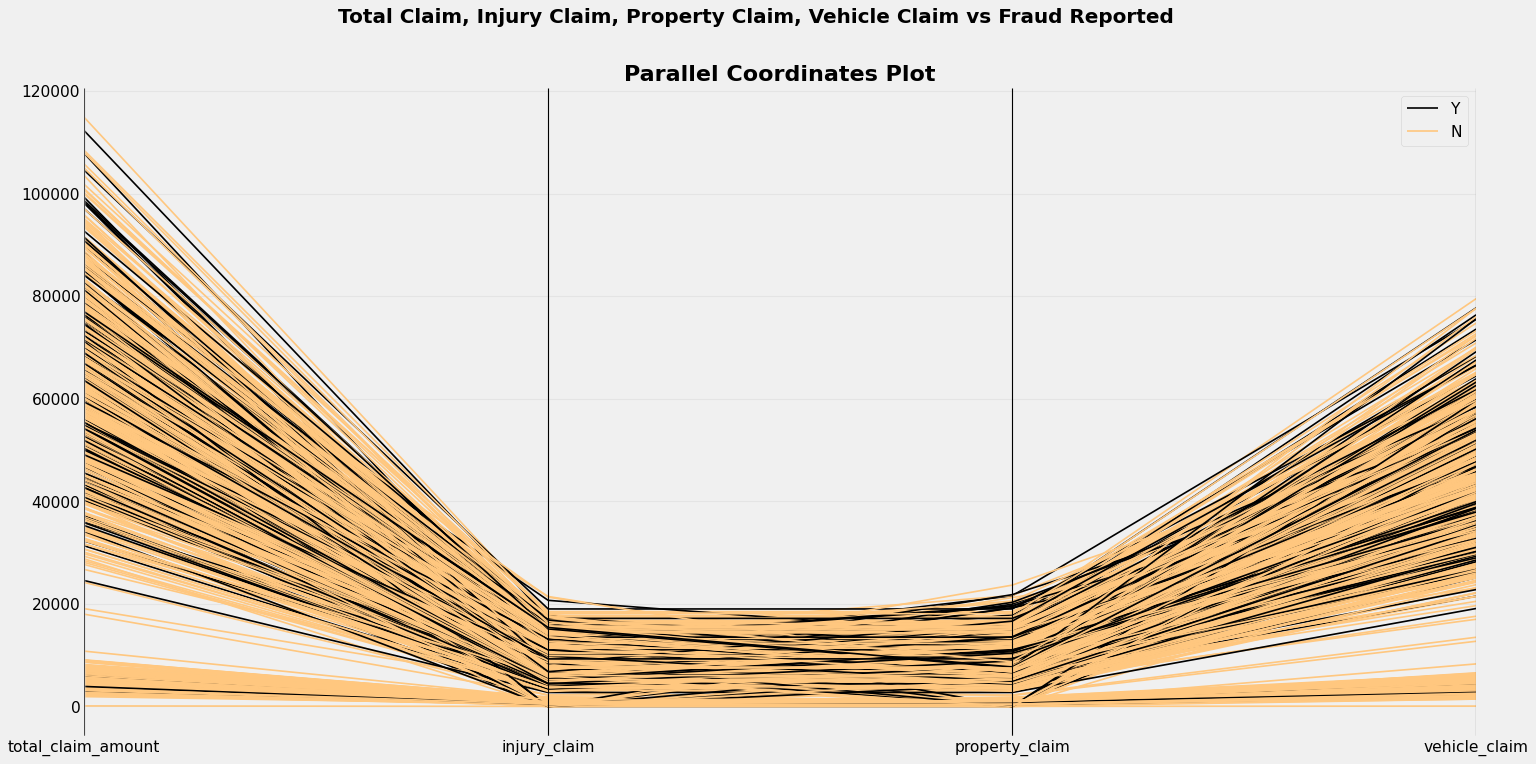

In [408]:
# Set figure size and resolution
plt.figure(figsize=(20, 10), dpi=80)

# Create parallel coordinates plot with improved formatting
parallel_coordinates(
    data[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']],
    class_column='fraud_reported',
    colormap='copper',
    linewidth=1.5  # Enhances line visibility
)

# Lighten borders for a cleaner look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_alpha(0)  # Remove top and right spines
for spine in ["bottom", "left"]:
    plt.gca().spines[spine].set_alpha(0.3)  # Lighten bottom and left spines

# Improve title formatting
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.suptitle('Total Claim, Injury Claim, Property Claim, Vehicle Claim vs Fraud Reported', fontsize=18, fontweight='bold')

# Add grid for better readability
plt.grid(alpha=0.3)

plt.show()

In [409]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Create a bubble plot using Plotly Express
fig = px.scatter(
    data,
    x="policy_annual_premium",
    y="total_claim_amount",
    size="months_as_customer",
    color="insured_sex",
    animation_frame="auto_year",
    title="Annual Premium vs Total Claim Amount vs Months as Customer",
    labels={
        "policy_annual_premium": "Annual Policy Premium",
        "total_claim_amount": "Total Claim Amount"
    },
    height=650
)

# Improve marker scaling for better visualization
fig.update_traces(marker=dict(sizemode='area', opacity=0.7))

fig.show()

In [410]:
# Create histogram trace with enhanced formatting
trace = go.Histogram(
    x=data['insured_education_level'],
    name='Education Level Distribution',
    opacity=0.75,
    marker=dict(
        color='rgba(195, 195, 145, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    )
)

# Define layout with improved clarity
layout = go.Layout(
    title='Education Level of Insured Customers',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Insured Education Level'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for better readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [411]:
# Create histogram trace with improved formatting
trace = go.Histogram(
    x=data['insured_occupation'],
    name='Insured Occupation Distribution',
    opacity=0.75,
    marker=dict(
        color='rgba(15, 255, 185, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    )
)

# Define layout with enhanced clarity
layout = go.Layout(
    title='Distribution of Insured Customers by Occupation',
    title_x=0.5,  # Centering the title
    xaxis=dict(title='Insured Occupation'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for improved readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [412]:
# Compute value counts for gender and relationship categories
sex_counts = data['insured_sex'].value_counts()
rel_counts = data['insured_relationship'].value_counts()

# Define labels and values
labels_sex, sizes_sex = sex_counts.index, sex_counts.values
labels_rel, sizes_rel = rel_counts.index, rel_counts.values

# Define color schemes for better contrast
colors_sex = ['aqua', 'gold']
colors_rel = ['pink', 'lightblue', 'lightgreen', 'grey', 'red']

# Create Pie charts
trace_sex = go.Pie(
    labels=labels_sex, 
    values=sizes_sex, 
    marker=dict(colors=colors_sex), 
    name='Gender', 
    hole=0.3
)

trace_rel = go.Pie(
    labels=labels_rel, 
    values=sizes_rel, 
    marker=dict(colors=colors_rel), 
    name='Relationship', 
    hole=0.3
)

# Define layouts with better formatting
layout_sex = go.Layout(title='Gender Distribution of Insured Customers', title_x=0.5)
layout_rel = go.Layout(title='Relationship Distribution of Insured Customers', title_x=0.5)

# Create figures and plot
fig_sex = go.Figure(data=[trace_sex], layout=layout_sex)
fig_rel = go.Figure(data=[trace_rel], layout=layout_rel)

py.iplot(fig_sex)
py.iplot(fig_rel)

In [413]:
# Create violin plot trace with better formatting
trace = go.Violin(
    x=data['insured_sex'],
    y=data['insured_zip'],
    name='Gender vs Insured Zip',
    opacity=0.75,
    marker=dict(
        color='rgba(215, 5, 185, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    ),
    box=dict(visible=True),  # Show box plot inside violin for more insights
    meanline=dict(visible=True)  # Show mean line for better interpretation
)

# Define layout with improved clarity
layout = go.Layout(
    title='Gender vs Insured Zip Distribution',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Insured Sex'),
    yaxis=dict(title='Insured ZIP Code'),
    violinmode='group'  # Better grouping of categories
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [414]:
# Create box plot trace with enhanced formatting
trace = go.Box(
    x=data['auto_make'],
    y=data['vehicle_claim'],
    opacity=0.7,
    marker=dict(
        color='rgba(215, 195, 5, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    ),
    boxmean=True  # Display mean in the box plot for additional insights
)

# Define layout with improved clarity
layout = go.Layout(
    title='Automobile Company vs Vehicle Claim Amount',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Automobile Company'),
    yaxis=dict(title='Vehicle Claim Amount'),
    boxmode='group'  # Improve grouping of box plots
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [415]:
# Create histogram trace with improved formatting
trace = go.Histogram(
    x=data['policy_annual_premium'],
    marker=dict(
        color='rgba(100, 75, 25, 0.7)'  # Using 'rgba' for better transparency control
    ),
    opacity=0.75  # Enhancing visualization clarity
)

# Define layout with better axis titles
layout = go.Layout(
    title='Distribution of Annual Policy Premiums',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Policy Annual Premium'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for improved readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [416]:
# Create histogram trace with enhanced formatting
trace = go.Histogram(
    x=data['age'],
    marker=dict(
        color='rgba(215, 245, 5, 0.7)'  # Using 'rgba' for better transparency control
    ),
    opacity=0.75  # Improves visualization clarity
)

# Define layout with corrected axis titles
layout = go.Layout(
    title='Age Distribution of Insured Customers',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Age'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for better readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [417]:
# Create 3D scatter plot with enhanced formatting
trace = go.Scatter3d(
    x=data['age'],
    y=data['property_claim'],
    z=data['vehicle_claim'],
    mode='markers',
    marker=dict(
        size=8,  # Adjusted marker size for better visibility
        color=data['age'],  # Coloring based on age
        colorscale='Viridis',  # Improved color scheme for better contrast
        opacity=0.8  # Slight transparency to enhance visibility
    )
)

# Define layout with corrected labels and better aesthetics
layout = go.Layout(
    title='Age vs Property Claim vs Vehicle Claim',
    title_x=0.5,  # Centering the title
    margin=dict(l=0, r=0, b=0, t=40),  # Adjusted top margin for title visibility
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Property Claim Amount'),
        zaxis=dict(title='Vehicle Claim Amount')
    )
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Data Processing

In [418]:
# let's extrat days, month and year from policy bind date

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')


In [419]:
# let's encode the fraud report to numerical values

data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

# checking the values of fraud reported
# data['fraud_reported'].value_counts()

In [420]:
# let's check the correlation of authorities_contacted with the target

data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [421]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

# let's check the values
# data['auto_make'].value_counts()

In [422]:
# let's check the correlation auto make with the target

data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [423]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

# let's check the values
# data['auto_make'].value_counts()

In [424]:
# let's check the correlation of authorities_contacted with the target

data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [425]:
# let's perform target encoding for property damage

data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))

# let's check the values
# data['police_report_available'].value_counts()

In [426]:
# let's check the correlation of authorities_contacted with the target

data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [427]:
# let's perform target encoding for property damage

data['property_damage'] = data['property_damage'].replace(('NO','YES'),(0.76,0.74))

# let's check the values
# data['property_damage'].value_counts()

In [428]:
# let's check the correlation of authorities_contacted with the target

data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [429]:
# let's do target encoding for incident city

data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

# let's check the values
# data['incident_city'].value_counts()

In [430]:
# let's check the correlation of authorities_contacted with the target

data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [431]:
# let's perform target encoding for incident state

data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

# checking the values
# data['incident_state'].value_counts()

In [432]:
# let's check the correlation of authorities_contacted with the target

data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
3,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
2,Other,0.681818


In [433]:
# let's perform target encoding for authorities contacted

data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

# let's check the values
#data['authorities'].value_counts()

In [434]:
# let's check the correlation of incident_severity with the target

data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [435]:
# let's perform target encoding for incident severity

data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

# let's check the values
# data['incident_severity'].value_counts()

In [436]:
# let's check the correlation of collision_type with the target

data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
1,Rear Collision,0.772340
2,Side Collision,0.746377
0,Front Collision,0.724409


In [437]:
# let's perform target encoding for collision type

data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

# let's check the values of collision type
# data['collision_type'].value_counts()

In [438]:
# let's check the correlation of incident_type with the target

data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [439]:
# let's perform target encoing for incident type

data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))

# let's check the values
#data['incident_type'].value_counts()

In [440]:
data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

# extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day


In [441]:
# let's know the relation between insured_relationship and fraud reported

data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [442]:
# let's do target encoding for insured relationship

data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

#data['insured-relationship'].value_counts()

In [443]:
# let's know the relation between insured_hobbies and fraud reported

data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [444]:
# let's perform target encoding for insured_hobbies

data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

#data['insured_hobbies'].value_counts()

In [445]:
# let's know the relation between insured_occupation and fraud reported

data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [446]:
# let's perform target encoding for insured_occupation

data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))
# data['insured_occupation'].value_counts()

In [447]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [448]:
# let's perform target encoding

data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))
#data['insured_education_level'].value_counts()

In [449]:
# lets know the relation of insured sex and fraud reported

data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [450]:
# target encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))
#data['insured_sex'].value_counts()

In [451]:
# csl - combined single limit

'''CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
Liability coverage and Property Damage Liability coverage per occurrence or accident.'''

# lets know the relation of policy state and fraud reported

data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [452]:
# target encoding for policy_csl

data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

# check the values
# data['policy_csl'].value_counts()

In [453]:

# lets know the relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)


,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [454]:
# target encoding for policy_csl

data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

# check the values
# data['policy_state'].value_counts()

In [455]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', '_c39', 'incident_month',
       'incident_day'],
      dtype='object')

In [456]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 36)
Shape of y : (1000,)


In [457]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 36)
Shape of x_test : (200, 36)
Shape of y_train : (800,)
Shape of y_test : (200,)


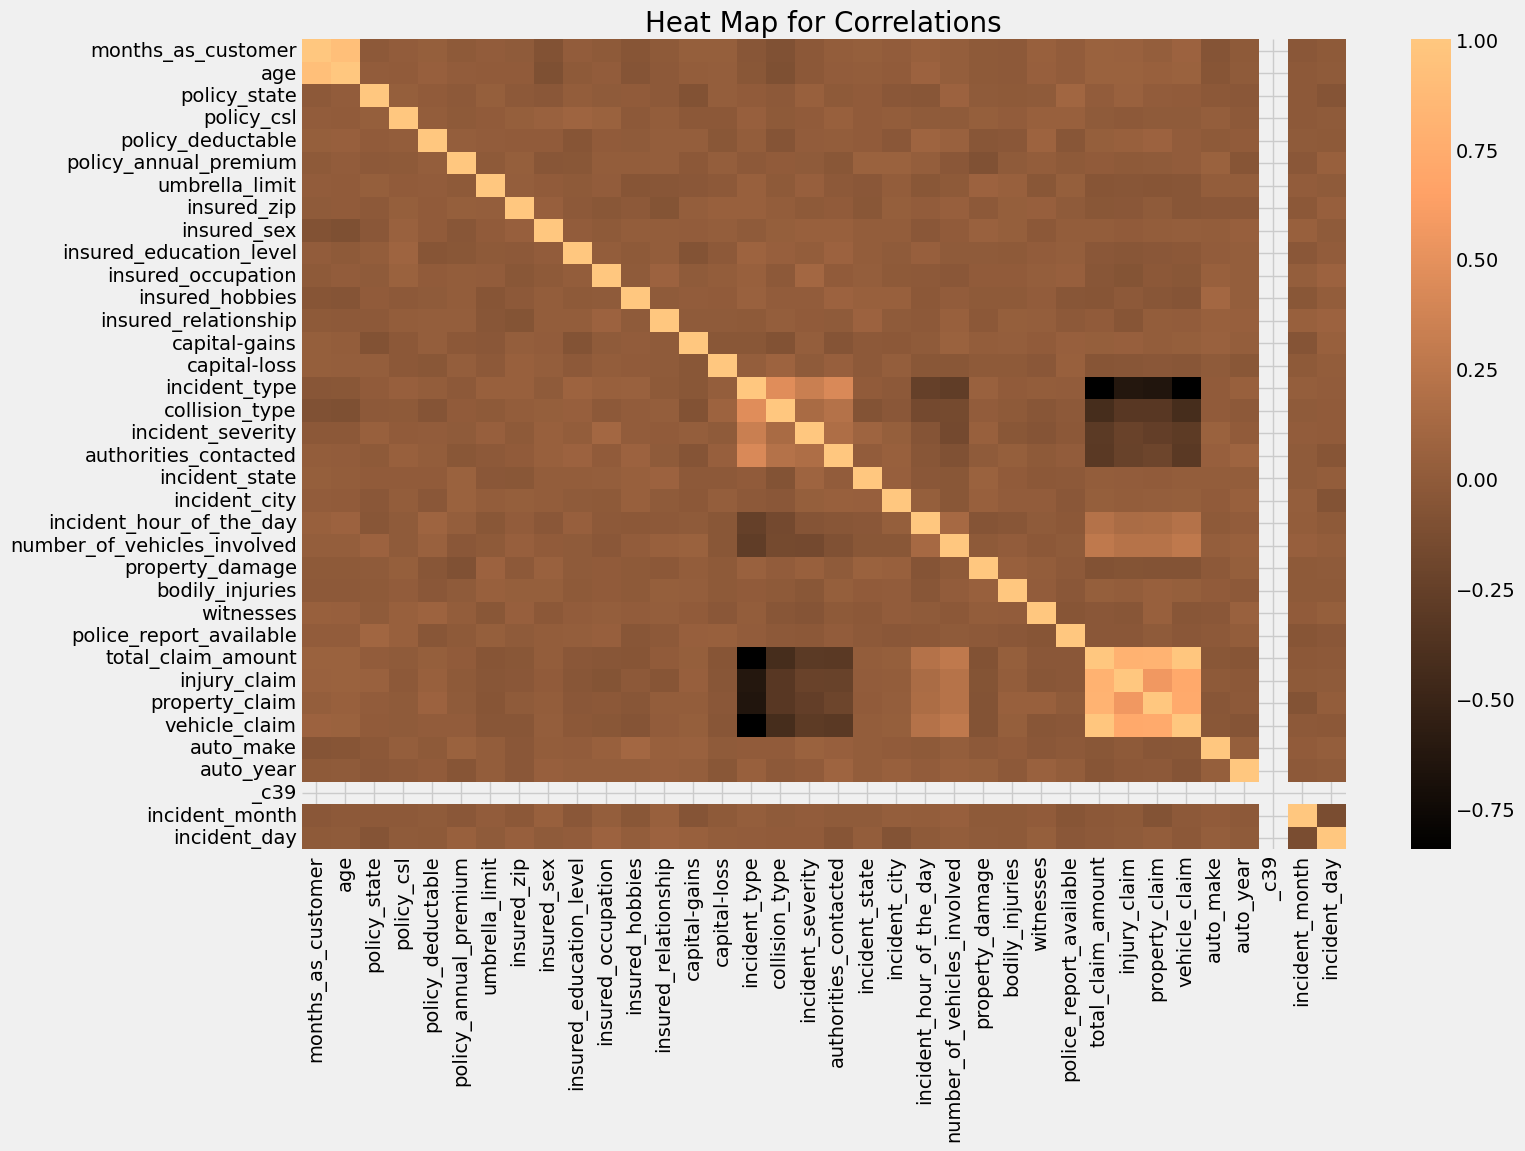

In [458]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

## Modelling with Ensemble of Samplers

**Random Forest Classifier**

Training Accuracy:  0.95125
Testing Accuarcy:  0.845
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        57
           1       0.91      0.87      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.83      0.82       200
weighted avg       0.85      0.84      0.85       200



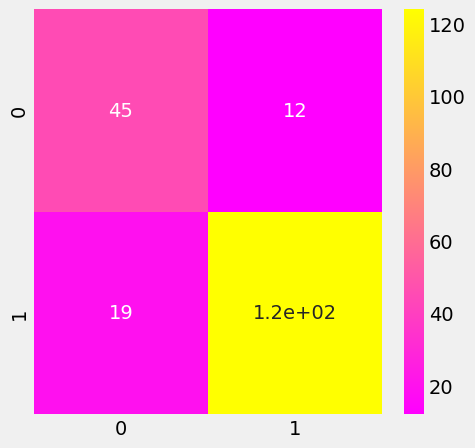

In [459]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

**Easy Ensemble Classifier**

Training Accuracy:  0.86375
Testing Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.71      0.81      0.75        57
           1       0.92      0.87      0.89       143

    accuracy                           0.85       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.85      0.85       200



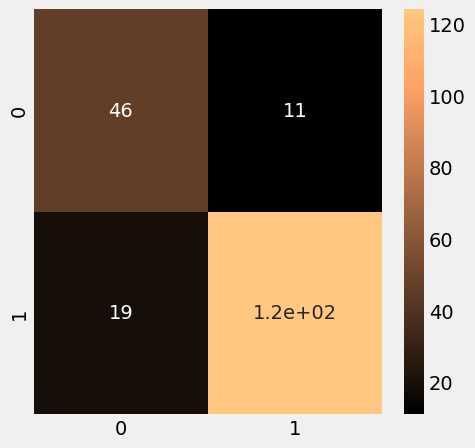

In [460]:
# # Easy Ensemble Classifier

# from imblearn.ensemble import EasyEnsembleClassifier 
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
                 

# model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

# model1.fit(x_train, y_train)
# y_pred_ef = model1.predict(x_test)

# print("Training Accuracy: ", model1.score(x_train, y_train))
# print('Testing Accuarcy: ', model1.score(x_test, y_test))

# # making a classification report
# cr = classification_report(y_test,  y_pred_ef)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred_ef)
# sns.heatmap(cm, annot = True, cmap = 'copper')
# plt.show()
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values (you can use 'mean', 'median', or 'most_frequent' strategies)
imputer = SimpleImputer(strategy='mean')  # Change strategy if necessary

# Apply the imputer to both X and y
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize the model
model1 = EasyEnsembleClassifier(n_estimators=100, random_state=0)

# Fit the model on the imputed data
model1.fit(x_train_imputed, y_train)
y_pred_ef = model1.predict(x_test_imputed)

# Print the results
print("Training Accuracy: ", model1.score(x_train_imputed, y_train))
print('Testing Accuracy: ', model1.score(x_test_imputed, y_test))

# Classification report
cr = classification_report(y_test, y_pred_ef)
print(cr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot=True, cmap='copper')
plt.show()


**Bagging Classifier**

Training Accuracy:  0.9425
Testing Accuracy:  0.845
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        57
           1       0.91      0.87      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.83      0.82       200
weighted avg       0.85      0.84      0.85       200



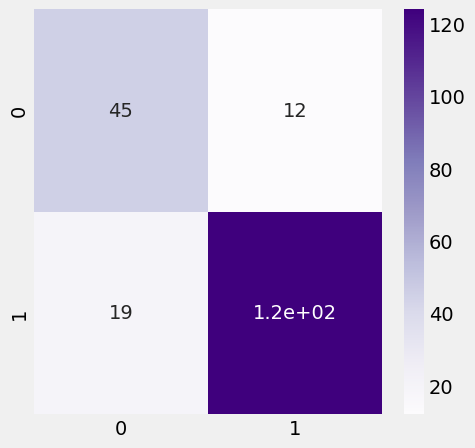

In [461]:
# # Random Forest with Bagging Classifier

# from imblearn.ensemble import BalancedBaggingClassifier 
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
                 

# model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
#                                  sampling_strategy = 'auto',
#                                  replacement = False,
#                                  random_state = 0)

# model2.fit(x_train, y_train)
# y_pred_bc = model2.predict(x_test)

# print("Training Accuracy: ", model2.score(x_train, y_train))
# print('Testing Accuarcy: ', model2.score(x_test, y_test))

# # making a classification report
# cr = classification_report(y_test,  y_pred_bc)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred_bc)
# sns.heatmap(cm, annot = True, cmap = 'Purples')
# plt.show()
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values (you can use 'mean', 'median', or 'most_frequent' strategies)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with another strategy if necessary

# Apply the imputer to both X and y
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize the model (replace classifier with estimator)
model2 = BalancedBaggingClassifier(estimator=RandomForestClassifier(),
                                   sampling_strategy='auto',
                                   replacement=False,
                                   random_state=0)

# Fit the model on the imputed data
model2.fit(x_train_imputed, y_train)
y_pred_bc = model2.predict(x_test_imputed)

# Print the results
print("Training Accuracy: ", model2.score(x_train_imputed, y_train))
print('Testing Accuracy: ', model2.score(x_test_imputed, y_test))

# Classification report
cr = classification_report(y_test, y_pred_bc)
print(cr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.show()



**Boosting the Predictions of above Models**

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        57
           1       0.91      0.87      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.83      0.82       200
weighted avg       0.85      0.84      0.85       200



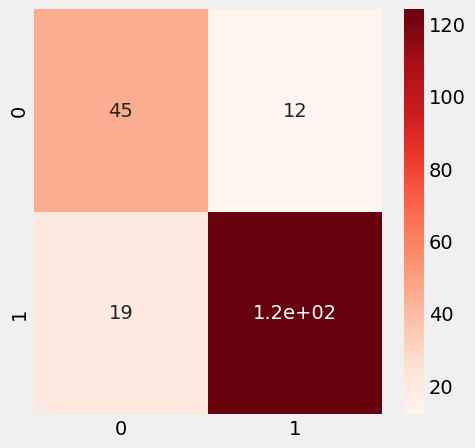

In [462]:
# boosting

y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.show()

**Voting Classifier**

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        57
           1       0.92      0.86      0.89       143

    accuracy                           0.85       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.85      0.85       200



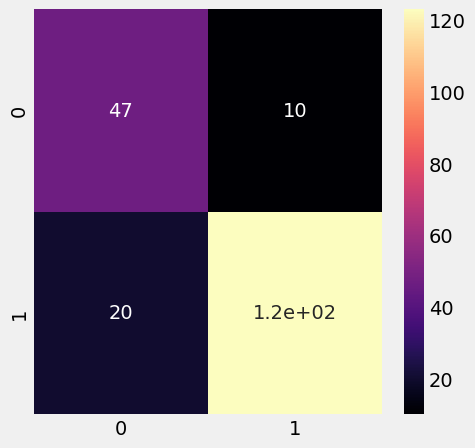

In [463]:
# from sklearn.ensemble import VotingClassifier

# vote_est = [ 
#     ('brf', BalancedRandomForestClassifier()),
#     ('bc', BalancedBaggingClassifier()),
#     ('eec',EasyEnsembleClassifier())]

# voting = VotingClassifier(estimators = vote_est , voting = 'soft')
# voting.fit(x_train, y_train)

# y_pred = voting.predict(x_test).astype(int)

# # making a classification report
# cr = classification_report(y_test,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot = True, cmap = 'magma')
# plt.show()
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as needed

# Fit the imputer on the training data and transform both X_train and X_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Define the voting classifier with your estimators
vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec', EasyEnsembleClassifier())
]

voting = VotingClassifier(estimators=vote_est, voting='soft')

# Fit the voting classifier on the imputed data
voting.fit(x_train_imputed, y_train)

# Make predictions
y_pred = voting.predict(x_test_imputed).astype(int)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='magma')
plt.show()


## Applying Sampling Techniques

**Under Sampling**

In [464]:
y.value_counts()

fraud_reported
1    753
0    247
Name: count, dtype: int64

In [465]:
frauds = np.array(data[data['fraud_reported'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

247


In [466]:
normal_indices = data[data['fraud_reported'] == 1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

753


In [467]:

random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

247


In [468]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

494


In [469]:

# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [470]:
# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']

print(x_u.shape)
print(y_u.shape)

(494, 36)
(494, 1)


In [471]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

(395, 36)
(395, 1)
(99, 36)


In [472]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)


Training Accuracy:  1.0
Testing Accuarcy:  0.898989898989899


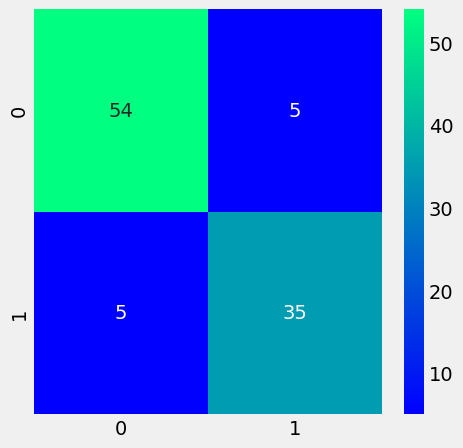

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        40

    accuracy                           0.90        99
   macro avg       0.90      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99



In [473]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred)
print(cr)

**Over Sampling with SMOTE** 

In [474]:
# from imblearn.over_sampling import SMOTE

# x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# print(x_resample.shape)
# print(y_resample.shape)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Create an imputer to fill missing values (e.g., with the mean of each column)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the features (X)
x_imputed = imputer.fit_transform(x)

# Apply SMOTE after imputing missing values
x_resample, y_resample = SMOTE().fit_resample(x_imputed, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)


(1506, 35)
(1506,)


In [475]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(1204, 35)
(1204,)
(302, 35)
(302,)


In [476]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  1.0
Testing Accuarcy:  0.8708609271523179


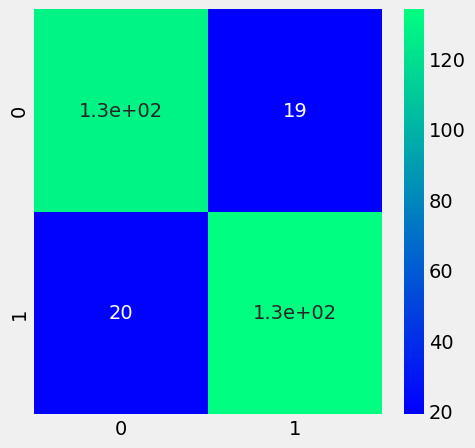

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       148
           1       0.88      0.87      0.87       154

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [477]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

## Model Explanation for Random Forest Classifier

In [478]:
# let's check the importance of each attributes

from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.1650 ± 0.0245,incident_severity
0.0950 ± 0.0089,insured_hobbies
0.0080 ± 0.0102,policy_state
0.0070 ± 0.0049,auto_year
0.0050 ± 0.0063,insured_relationship
0.0020 ± 0.0174,policy_annual_premium
0.0020 ± 0.0049,umbrella_limit
0.0020 ± 0.0102,injury_claim
0.0020 ± 0.0136,incident_hour_of_the_day
0.0010 ± 0.0075,insured_occupation


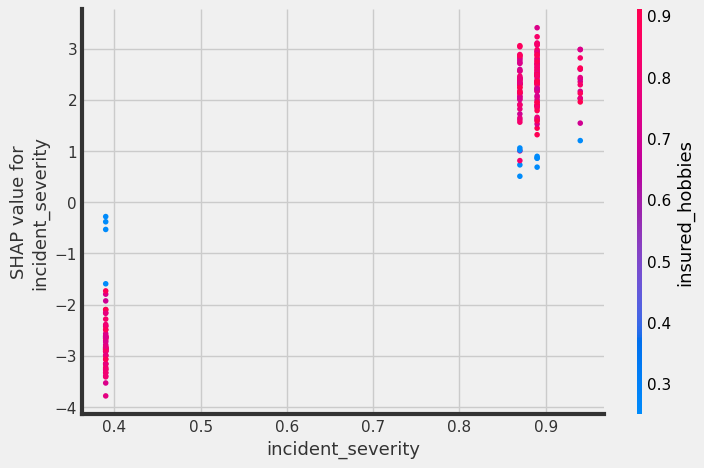

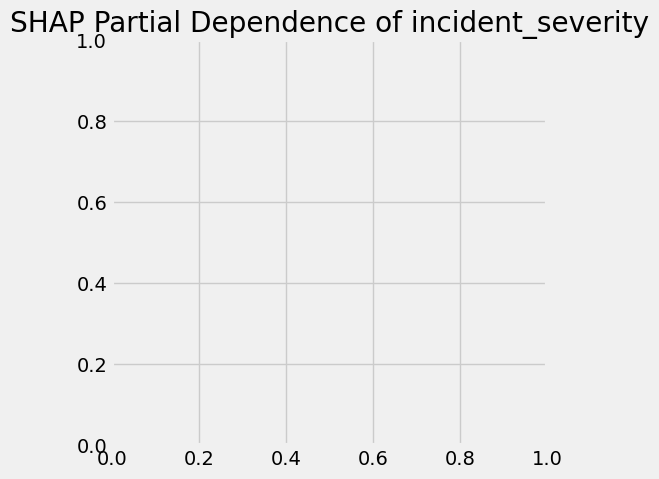

In [479]:
# from pdpbox import pdp, info_plots #for partial plots

# base_features = x_train.columns.values.tolist()

# feat_name = 'incident_severity'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

# pdp.pdp_plot(pdp_dist, feat_name)
# plt.show()
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your XGBoost model
model = xgb.XGBClassifier()  # Use XGBRegressor() if doing regression
model.fit(x_train, y_train)

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Plot SHAP partial dependence for a specific feature
feat_name = 'incident_severity'

# Create a SHAP dependence plot for a single feature
shap.dependence_plot(feat_name, shap_values, x_test)

# Show the plot
plt.title(f"SHAP Partial Dependence of {feat_name}")
plt.show()


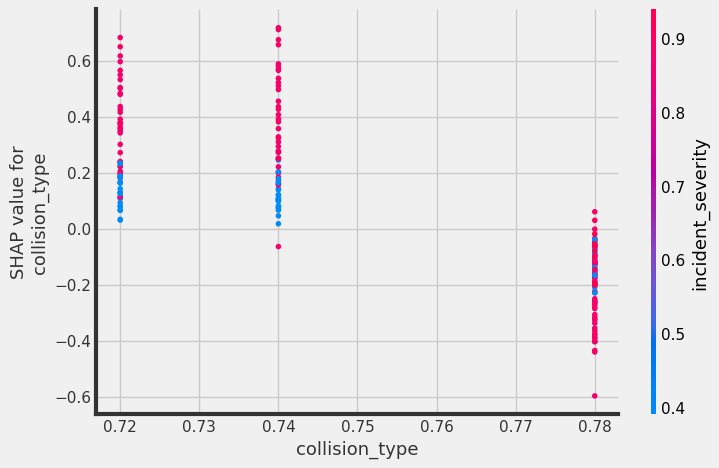

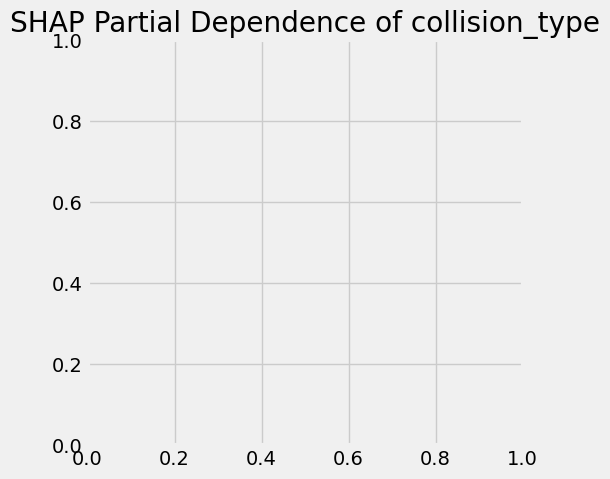

In [480]:
# from pdpbox import pdp, info_plots #for partial plots

# base_features = x_train.columns.values.tolist()

# feat_name = 'collision_type'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

# pdp.pdp_plot(pdp_dist, feat_name)
# plt.show()
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your model (assuming XGBoost classifier is used)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Create a SHAP dependence plot for the feature
feat_name = 'collision_type'
shap.dependence_plot(feat_name, shap_values, x_test)

# Show the plot
plt.title(f"SHAP Partial Dependence of {feat_name}")
plt.show()


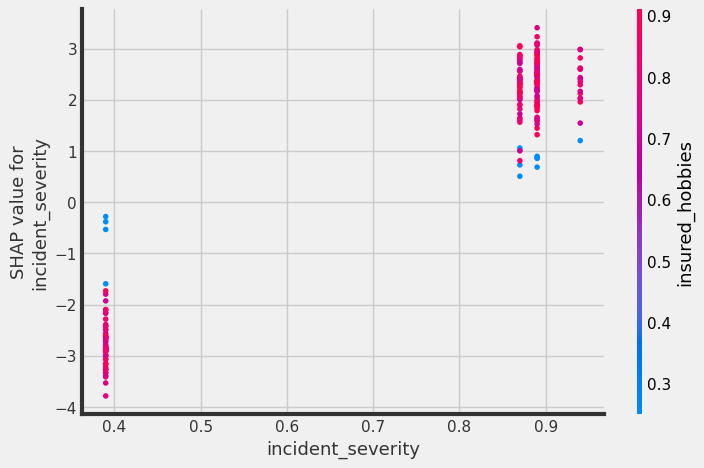

In [481]:
# from pdpbox import pdp, info_plots #for partial plots

# base_features = x_train.columns.values.tolist()

# feat_name = 'incident_severity'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

# pdp.pdp_plot(pdp_dist, feat_name)
# plt.show()
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already trained the model
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Initialize SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Get SHAP values for your dataset
shap_values = explainer.shap_values(x_test)

# Plot the SHAP dependence plot
shap.dependence_plot('incident_severity', shap_values, x_test)

# Show the plot
plt.show()


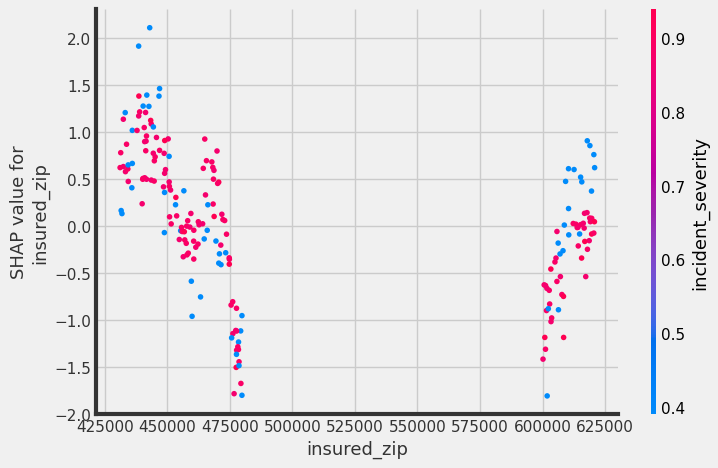

In [482]:
# from pdpbox import pdp, info_plots #for partial plots

# base_features = x_train.columns.values.tolist()

# feat_name = 'insured_zip'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

# pdp.pdp_plot(pdp_dist, feat_name)
# plt.show()
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming your model is trained and you have the data
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Initialize SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Get SHAP values for your test data
shap_values = explainer.shap_values(x_test)

# Plot SHAP dependence plot for a feature
shap.dependence_plot('insured_zip', shap_values, x_test)

# Show the plot
plt.show()

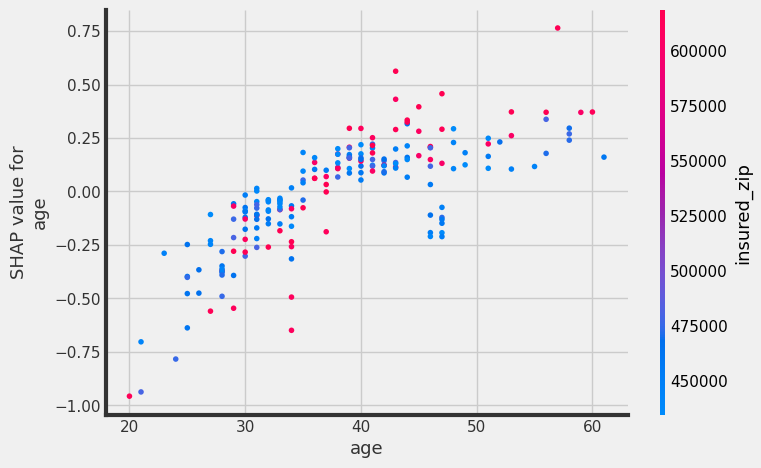

In [483]:
# from pdpbox import pdp, info_plots #for partial plots

# base_features = x_train.columns.values.tolist()

# feat_name = 'age'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

# pdp.pdp_plot(pdp_dist, feat_name)
# plt.show()
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have your XGBoost model already trained (if not, train it)
# model = xgb.XGBClassifier()
# model.fit(x_train, y_train)

# Initialize SHAP explainer for tree-based models (XGBoost)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for your test dataset
shap_values = explainer.shap_values(x_test)

# Plot the SHAP dependence plot for the 'age' feature
shap.dependence_plot('age', shap_values, x_test)

# Show the plot
plt.show()

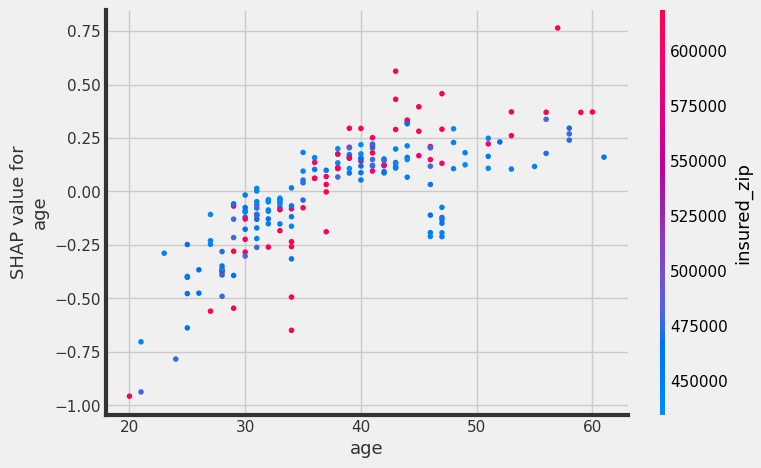

In [484]:
# # let's see the shap values

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(x_test)

# shap.summary_plot(shap_values[1], x_test, plot_type="bar")
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values for your test dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# Visualize SHAP dependence plot for a specific feature (e.g., 'age')
shap.dependence_plot('age', shap_values, x_test)

plt.show()
